### script for merging convective classifications
### from different years into one file
### date created: 13 Oct. 2021
### author: doughert@ucar.edu

In [1]:
import math 
import numpy as np
import pandas as pd
import matplotlib as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc
from netCDF4 import Dataset, num2date
from datetime import datetime, date, timedelta
import glob
import xarray as xr
import geopandas as gp
#from wrf import getvar, ALL_TIMES

### import isolated convection

In [2]:
iso_conv_95 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/non_convect_daily_bukovsky_regions_1995_1996.csv', header=0)
iso_conv_97 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/non_convect_daily_bukovsky_regions_1997_1999.csv', header=0)
iso_conv_00 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/non_convect_daily_bukovsky_regions_2000_2002.csv', header=0)
iso_conv_03 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/non_convect_daily_bukovsky_regions_2003_2005.csv', header=0)
iso_conv_06 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/non_convect_daily_bukovsky_regions_2006_2008.csv', header=0)
iso_conv_09 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/non_convect_daily_bukovsky_regions_2009_2011.csv', header=0)
iso_conv_12 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/non_convect_daily_bukovsky_regions_2012_2014.csv', header=0)
iso_conv_15 = pd.read_csv('/glade/scratch/doughert/grid_refl_out/non_convect_daily_bukovsky_regions_2015_2017.csv', header=0)

In [3]:
iso_conv_all = pd.concat([iso_conv_95, iso_conv_97, iso_conv_00, iso_conv_03, iso_conv_06, iso_conv_09, 
                          iso_conv_12, iso_conv_15])
iso_conv_all = iso_conv_all.drop(['Unnamed: 0'], axis=1)
iso_conv_all = iso_conv_all.rename({'time_x':'date'}, axis=1)
iso_conv_all['date'] = pd.to_datetime(iso_conv_all['date'])

In [4]:
print(iso_conv_all)

      region       date  occurrence  object_idx   size (km)    avg_dbz  \
0     Desert 1995-01-01         1.0  204.625000  124.250000  23.401855   
1     Desert 1995-01-02         1.0  251.000000  143.500000  23.188750   
2     Desert 1995-01-03         1.0  442.625000  177.125000  25.532783   
3     Desert 1995-01-04         1.0  594.133333  391.433333  22.589044   
4     Desert 1995-01-05         1.0  169.740741  966.111111  23.714456   
...      ...        ...         ...         ...         ...        ...   
7667   South 2017-12-27         1.0  507.930481  699.497326  23.016267   
7668   South 2017-12-28         1.0  224.215385  257.446154  23.572514   
7669   South 2017-12-29         1.0  291.269231  288.115385  22.676336   
7670   South 2017-12-30         1.0  198.200000   73.000000  23.019903   
7671   South 2017-12-31         1.0  132.864865  306.189189  23.387731   

        max_dbz  
0     27.979376  
1     23.188750  
2     33.635063  
3     30.603889  
4     33.888765  
...

### export df 

In [16]:
iso_conv_all.to_csv('non_convective_daily_counts_bukovsky_regions.csv')

### separate df by region

In [5]:
iso_conv_pacnw = iso_conv_all[iso_conv_all['region']=='Pac_NW']
iso_conv_pacsw = iso_conv_all[iso_conv_all['region']=='Pac_SW']
iso_conv_mnt = iso_conv_all[iso_conv_all['region']=='MountainW']
iso_conv_desert = iso_conv_all[iso_conv_all['region']=='Desert']
iso_conv_gp = iso_conv_all[iso_conv_all['region']=='GP']
iso_conv_prr = iso_conv_all[iso_conv_all['region']=='Praire']
iso_conv_south = iso_conv_all[iso_conv_all['region']=='South']
iso_conv_lakes = iso_conv_all[iso_conv_all['region']=='Lakes']
iso_conv_east = iso_conv_all[iso_conv_all['region']=='East']

In [6]:
print(type(iso_conv_mnt['date'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [7]:
dates_since_1995 = pd.DataFrame({'date':pd.date_range(start='1995-01-01', end='2017-12-31', freq='D')})

In [8]:
iso_conv_pacnw_time = iso_conv_pacnw.merge(dates_since_1995, how='right', on='date')
iso_conv_pacsw_time = iso_conv_pacsw.merge(dates_since_1995, how='right', on='date')
iso_conv_mnt_time = iso_conv_mnt.merge(dates_since_1995, how='right', on='date')
iso_conv_desert_time = iso_conv_desert.merge(dates_since_1995, how='right', on='date')
iso_conv_gp_time = iso_conv_gp.merge(dates_since_1995, how='right', on='date')
iso_conv_prr_time = iso_conv_prr.merge(dates_since_1995, how='right', on='date')
iso_conv_south_time = iso_conv_south.merge(dates_since_1995, how='right', on='date')
iso_conv_lakes_time = iso_conv_lakes.merge(dates_since_1995, how='right', on='date')
iso_conv_east_time = iso_conv_east.merge(dates_since_1995, how='right', on='date')

### repalces Nans with 0 occurrence

In [9]:
iso_conv_pacnw_time = iso_conv_pacnw_time.fillna({"occurrence":0})
iso_conv_pacsw_time = iso_conv_pacsw_time.fillna({"occurrence":0})
iso_conv_mnt_time = iso_conv_mnt_time.fillna({"occurrence":0})
iso_conv_desert_time = iso_conv_desert_time.fillna({"occurrence":0})
iso_conv_gp_time = iso_conv_gp_time.fillna({"occurrence":0})
iso_conv_prr_time = iso_conv_prr_time.fillna({"occurrence":0})
iso_conv_south_time = iso_conv_south_time.fillna({"occurrence":0})
iso_conv_lakes_time = iso_conv_lakes_time.fillna({"occurrence":0})
iso_conv_east_time = iso_conv_east_time.fillna({"occurrence":0})

#### drop duplicates

In [10]:
iso_conv_mnt_time = iso_conv_mnt_time.drop_duplicates(subset=['date'],keep='first')
iso_conv_desert_time = iso_conv_desert_time.drop_duplicates(subset=['date'],keep='first')
iso_conv_gp_time = iso_conv_gp_time.drop_duplicates(subset=['date'],keep='first')
iso_conv_prr_time = iso_conv_prr_time.drop_duplicates(subset=['date'],keep='first')
iso_conv_south_time = iso_conv_south_time.drop_duplicates(subset=['date'],keep='first')
iso_conv_lakes_time = iso_conv_lakes_time.drop_duplicates(subset=['date'],keep='first')
iso_conv_east_time = iso_conv_east_time.drop_duplicates(subset=['date'],keep='first')

In [11]:
print(len(iso_conv_east_time))

8401


In [12]:
iso_conv_len_mnt = np.where(iso_conv_mnt_time['occurrence']==1.0)[0]
iso_conv_len_desert = np.where(iso_conv_desert_time['occurrence']==1.0)[0]
iso_conv_len_gp = np.where(iso_conv_gp_time['occurrence']==1.0)[0]
iso_conv_len_prr = np.where(iso_conv_prr_time['occurrence']==1.0)[0]
iso_conv_len_south = np.where(iso_conv_south_time['occurrence']==1.0)[0]
iso_conv_len_lakes = np.where(iso_conv_lakes_time['occurrence']==1.0)[0]
iso_conv_len_east = np.where(iso_conv_east_time['occurrence']==1.0)[0]
iso_conv_len_pacnw = np.where(iso_conv_pacnw_time['occurrence']==1.0)[0]
iso_conv_len_pacsw = np.where(iso_conv_pacsw_time['occurrence']==1.0)[0]

In [13]:
print('total # in east:', len(iso_conv_len_east))
print('total # in south:',len(iso_conv_len_south))
print('total # in lakes:',len(iso_conv_len_lakes))
print('total # in prrr:',len(iso_conv_len_prr))
print('total # in gp:',len(iso_conv_len_gp))
print('total # in mnt:',len(iso_conv_len_mnt))
print('total # in desert:',len(iso_conv_len_desert))
print('total # in pacsw:',len(iso_conv_len_pacsw))
print('total # in pacnw:',len(iso_conv_len_pacnw))

total # in east: 8345
total # in south: 8378
total # in lakes: 8071
total # in prrr: 8167
total # in gp: 8357
total # in mnt: 8096
total # in desert: 8006
total # in pacsw: 0
total # in pacnw: 0


In [14]:
print('avg # in east:', len(iso_conv_len_east)/23)
print('avg # in south:',len(iso_conv_len_south)/23)
print('avg # in lakes:',len(iso_conv_len_lakes)/23)
print('avg # in prrr:',len(iso_conv_len_prr)/23)
print('avg # in gp:',len(iso_conv_len_gp)/23)
print('avg # in mnt:',len(iso_conv_len_mnt)/23)
print('avg # in desert:',len(iso_conv_len_desert)/23)
print('avg # in pacsw:',len(iso_conv_len_pacsw)/23)
print('avg # in pacnw:',len(iso_conv_len_pacnw)/23)

avg # in east: 362.82608695652175
avg # in south: 364.2608695652174
avg # in lakes: 350.9130434782609
avg # in prrr: 355.0869565217391
avg # in gp: 363.3478260869565
avg # in mnt: 352.0
avg # in desert: 348.0869565217391
avg # in pacsw: 0.0
avg # in pacnw: 0.0


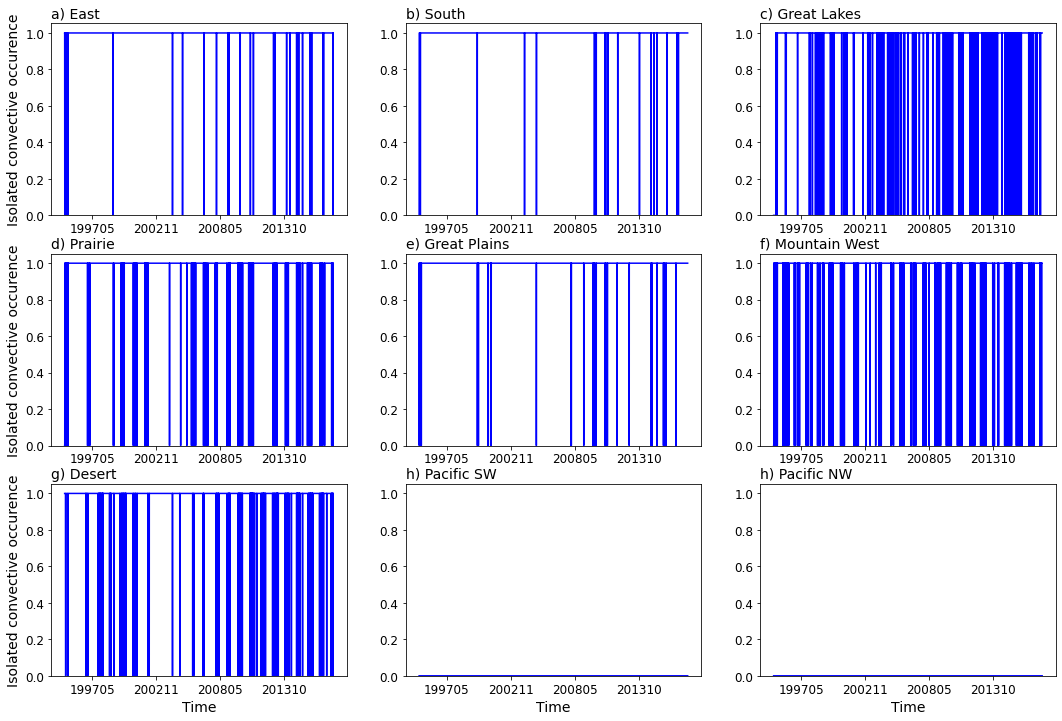

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

fig = plt.figure(figsize = (18,12))
date_plot = matplotlib.dates.date2num(iso_conv_east_time['date'])
date_fmt = matplotlib.dates.DateFormatter('%Y%m')

ax1 = plt.subplot(3, 3, 1, )
ax1.plot(date_plot, iso_conv_east_time['occurrence'], c='b')
#ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Isolated convective occurence', fontsize=14)
ax1.tick_params(axis='both',labelsize=12)
ax1.xaxis.set_major_formatter(date_fmt)
ax1.set_ylim(0,1.052)
ax1.set_title('a) East', loc='left', fontsize=14)

ax2 = plt.subplot(3, 3, 2,)
ax2.plot(date_plot, iso_conv_south_time['occurrence'], c='b')
#ax2.set_xlabel('Time', fontsize=14)
#ax2.set_ylabel('TC occurence', fontsize=14)
ax2.tick_params(axis='both',labelsize=12)
ax2.xaxis.set_major_formatter(date_fmt)
ax2.set_ylim(0,1.052)
ax2.set_title('b) South', loc='left', fontsize=14)

ax3 = plt.subplot(3, 3, 3, sharex=ax1)
ax3.plot(date_plot, iso_conv_lakes_time['occurrence'], c='b')
#ax3.set_xlabel('Time', fontsize=14)
#ax3.set_ylabel('TC occurence', fontsize=14)
ax3.tick_params(axis='both',labelsize=12)
ax3.xaxis.set_major_formatter(date_fmt)
ax3.set_ylim(1995,2015)
ax3.set_ylim(0,1.052)
ax3.set_title('c) Great Lakes', loc='left', fontsize=14)


ax4 = plt.subplot(3, 3, 4,sharex=ax1)
ax4.plot(date_plot, iso_conv_prr_time['occurrence'], c='b')
#ax4.set_xlabel('Time', fontsize=14)
ax4.set_ylabel('Isolated convective occurence', fontsize=14)
ax4.tick_params(axis='both',labelsize=12)
ax4.xaxis.set_major_formatter(date_fmt)
ax4.set_ylim(0,1.052)
ax4.set_title('d) Prairie', loc='left', fontsize=14)


ax5 = plt.subplot(3, 3, 5,sharex=ax2)
ax5.plot(date_plot, iso_conv_gp_time['occurrence'], c='b')
#ax5.set_xlabel('Time', fontsize=14)
#ax5.set_ylabel('TC occurence', fontsize=14)
ax5.tick_params(axis='both',labelsize=12)
ax5.xaxis.set_major_formatter(date_fmt)
ax5.set_ylim(0,1.052)
ax5.set_title('e) Great Plains', loc='left', fontsize=14)


ax6 = plt.subplot(3, 3, 6,sharex=ax2)
ax6.plot(date_plot, iso_conv_mnt_time['occurrence'], c='b')
#ax6.set_xlabel('Time', fontsize=14)
#ax6.set_ylabel('TC occurence', fontsize=14)
ax6.tick_params(axis='both',labelsize=12)
ax6.xaxis.set_major_formatter(date_fmt)
ax6.set_ylim(0,1.052)
ax6.set_title('f) Mountain West', loc='left', fontsize=14)


ax7 = plt.subplot(3, 3, 7,sharex=ax2)
ax7.plot(date_plot, iso_conv_desert_time['occurrence'], c='b')
ax7.set_xlabel('Time', fontsize=14)
ax7.set_ylabel('Isolated convective occurence', fontsize=14)
ax7.tick_params(axis='both',labelsize=12)
ax7.xaxis.set_major_formatter(date_fmt)
ax7.set_ylim(0,1.052)
ax7.set_title('g) Desert', loc='left', fontsize=14)


ax8 = plt.subplot(3, 3, 8,sharex=ax2)
ax8.plot(date_plot, iso_conv_pacsw_time['occurrence'], c='b')
ax8.set_xlabel('Time', fontsize=14)
#ax8.set_ylabel('TC occurence', fontsize=14)
ax8.tick_params(axis='both',labelsize=12)
ax8.xaxis.set_major_formatter(date_fmt)
ax8.set_ylim(0,1.052)
ax8.set_title('h) Pacific SW', loc='left', fontsize=14)


ax9 = plt.subplot(3, 3, 9,sharex=ax2)
ax9.plot(date_plot, iso_conv_pacsw_time['occurrence'], c='b')
ax9.set_xlabel('Time', fontsize=14)
#ax9.set_ylabel('TC occurence', fontsize=14)
ax9.tick_params(axis='both',labelsize=12)
ax9.xaxis.set_major_formatter(date_fmt)
ax9.set_ylim(0,1.052)
ax9.set_title('h) Pacific NW', loc='left', fontsize=14)

plt.savefig('non_convective_Bukovsky_regions_1995–2017.png', bbox_inches='tight', transparent=False, facecolor='white', dpi=250)
plt.show()